In [24]:
import pandas as pd
import numpy as np
from itertools import combinations
from gensim.models import Word2Vec

%matplotlib inline

In [7]:
count_df = pd.read_csv('../data/nv_rest_cuisine_counts.tsv', sep=' "', names=['cnt', 'cuisine'])
count_df['cuisine'] = count_df['cuisine'].apply(lambda s: s[:-1])

/home/phui/Softwares/python_envs/ml/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [12]:
selected_cuisines = set(e for e in count_df.head(10)['cuisine'])

In [16]:
type_df = pd.read_csv('../data/nv_restaurant_long_lat_categories_most.tsv', sep='\t',
                      names=['bid', 'long', 'lat' , 'cuisine'])
type_df.head()

,bid,long,lat,cuisine
0,--jFTZmywe7StuZ2hEjxyA,-115.182007,36.118820,Sandwiches
1,--zgHBiQpr8H2ZqSdGmguQ,-115.172043,36.106541,Chinese
2,-1B-DEGkLE1kDj5ENAF2NQ,-115.240837,36.114079,Modern European
3,-1ERbsOf9XOC9wGbZYFr7g,-115.351509,36.159061,Mexican
4,-27u-98Ugczq_xsNPdcvEg,-114.968765,36.027550,Breakfast & Brunch


In [46]:
count_df

,cnt,cuisine
0,483,Mexican
1,380,Pizza
2,331,American (Traditional)
3,268,Burgers
4,251,Fast Food
5,241,Japanese
6,217,Sandwiches
7,217,American (New)
8,204,Chinese
9,165,Breakfast & Brunch


In [18]:
rest_by_cuisines = type_df[type_df['cuisine'].isin(selected_cuisines)].groupby('cuisine').apply(lambda df: set(df['bid'])).to_dict()

In [19]:
rest_by_cuisines

{'American (New)': {'-8NkeBMgbGX97In5NEZtqA',
  '15JT2xhzP_R96mT6rK882A',
  '1Zj3JOukVxyU2kq4Vhju9A',
  '25fxw_jOqZtJwl18cCarIA',
  '2BsEO4TZwg12dOl-FGijsQ',
  '2MmMDll1ZGouFtz_87X5RQ',
  '2XQzbeFSKuhOiJujH01o-g',
  '34JQEZg9DgTpzZ8tnAw_CQ',
  '3wtRs_Ou0wingfANRnHBIA',
  '40sr9NKRHykb6a0oWP02ug',
  '41t-hpClH6k5ZlK39Q3WIQ',
  '4ntvolhaYeSCbHY1dhA53A',
  '56Ulj9IFRp5Pz8ufJSHXBg',
  '57vXy5NIdmAFk1hhmsBLcg',
  '5FE1Y9cZ-YOQA943nTi7cA',
  '5UhvArR-D1cBL3V21oaosQ',
  '5dSQ1KV9HkbZm0ZmJHuMKA',
  '5oaHZw1g-Rbiianma5zU5g',
  '5rtC3OBCIq0WKVoKH--GCg',
  '6IRoWd6N__OVMNQfvu1Ccw',
  '6OJV--BjqPpJjnTueniqVw',
  '6P3SsceAMT39CBlo0upqHQ',
  '6QQ1qO4X9NBBsrq4tYb5dQ',
  '6h8uCL6lF_KJC0nfYiTBwg',
  '6sNvLW4fVBWEgze71pGDZQ',
  '76t_NE9GQthoryLZgDyxGg',
  '7_fiK6AQbcBlAXsoS7QZRw',
  '84bLhe1aibxNmogtqSO4rA',
  '88CNSyeoKhGn1x0SHvz8Ig',
  '8N__d1JABpJW6VnJoxKpcw',
  '8RYf6xuRZDTyvX59eTAydw',
  '8xH3A2heV5oIFn3EXu7AcA',
  '8ybK693HDdSGs8EwGrfJCA',
  '91ohFfAbLvc7HcI68OHy3w',
  '98Cs_twO8VAroN3oA5TkGw',
  

In [37]:
def plot_difference(model_fname, items_by_cat):
    model = Word2Vec.load(model_fname)
    for c, s in items_by_cat.items():
        within_cat_sim = pd.Series(model.similarity(i1, i2) for i1, i2 in combinations(s, 2)
                                  if i1 in model and i2 in model)
        within_cat_sim.hist(label=c, bins=20, alpha=0.1, normed=True)

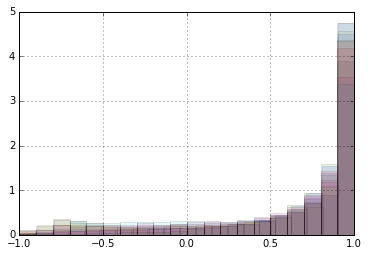

In [39]:
plot_difference('../rest_embedding/nv/nv_w2v_2d.dat', rest_by_cuisines)

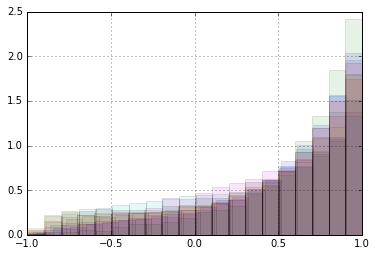

In [41]:
plot_difference('../rest_embedding/nv/nv_w2v_3d.dat', rest_by_cuisines)

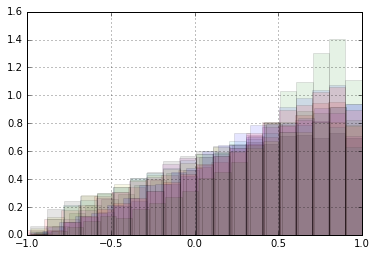

In [42]:
plot_difference('../rest_embedding/nv/nv_w2v_4d.dat', rest_by_cuisines)

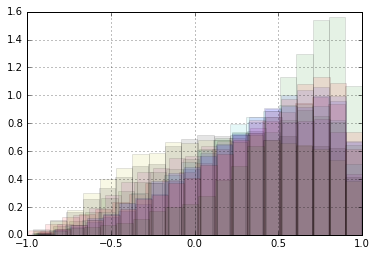

In [43]:
plot_difference('../rest_embedding/nv/nv_w2v_5d.dat', rest_by_cuisines)

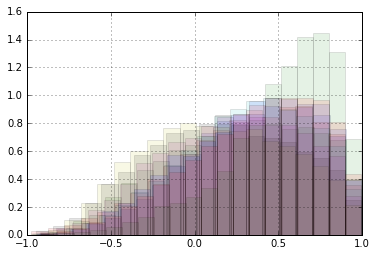

In [44]:
plot_difference('../rest_embedding/nv/nv_w2v_6d.dat', rest_by_cuisines)

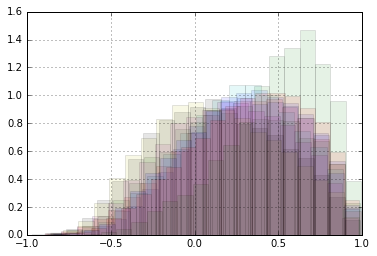

In [47]:
plot_difference('../rest_embedding/nv/nv_w2v_10d.dat', rest_by_cuisines)